In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Загрузка данных (замените путь на актуальный)
cntrbtrs_clnts_ops = pd.read_csv('train_data/cntrbtrs_clnts_ops_trn.csv', encoding='windows-1251', sep=';', low_memory=False)
trnsctns_ops = pd.read_csv('train_data/trnsctns_ops_trn.csv', encoding='windows-1251', sep=';')
print()

# Объединение таблиц по идентификатору счета (accnt_id)
data = pd.merge(cntrbtrs_clnts_ops, trnsctns_ops, on='accnt_id', how='left')

# Обработка пропусков: добавим индикаторы для некоторых столбцов и заменим NaN на 0 или "Unknown"
for col in ['brth_plc', 'email', 'phn']:
    data[col + '_missing'] = data[col].isna().astype(int)  # индикатор пропуска
    if data[col].dtype == 'object':
        data[col].fillna('Unknown', inplace=True)
    else:
        data[col].fillna(0, inplace=True)

# Нормализация числовых признаков
scaler = StandardScaler()

# Определение признаков для нормализации
numeric_features = ['sum', 'prsnt_age', 'cprtn_prd_d']

# Применение стандартизации
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Проверка итоговых данных
data.head()

C:\Users\macar\AppData\Local\Temp\ipykernel_12180\1576432104.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna('Unknown', inplace=True)
C:\Users\macar\AppData\Local\Temp\ipykernel_12180\1576432104.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,...,assgn_npo,assgn_ops,mvmnt_type,sum_type,cmmnt,sum,oprtn_date,brth_plc_missing,email_missing,phn_missing
0,0,0x03ED62E56DAEA24B96D6F1252D713286,0xFFB14DE2D28AAD45B08AC54ADDFE6AD2,ж,1960,-0.052847,2005-12-21,-0.346125,0,Накопительный период,...,нет,нет,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,0.610140,2006-02-10,0,0,0
1,0,0x03ED62E56DAEA24B96D6F1252D713286,0xFFB14DE2D28AAD45B08AC54ADDFE6AD2,ж,1960,-0.052847,2005-12-21,-0.346125,0,Накопительный период,...,нет,нет,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,-0.165690,2006-06-09,0,0,0
2,0,0x03ED62E56DAEA24B96D6F1252D713286,0xFFB14DE2D28AAD45B08AC54ADDFE6AD2,ж,1960,-0.052847,2005-12-21,-0.346125,0,Накопительный период,...,нет,нет,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,-0.165690,2006-11-04,0,0,0
3,0,0x03ED62E56DAEA24B96D6F1252D713286,0xFFB14DE2D28AAD45B08AC54ADDFE6AD2,ж,1960,-0.052847,2005-12-21,-0.346125,0,Накопительный период,...,нет,нет,0.0,ИД на страховые взносы на НЧ,Распределение ИД ОПС,-0.070514,2006-11-16,0,0,0
4,0,0x03ED62E56DAEA24B96D6F1252D713286,0xFFB14DE2D28AAD45B08AC54ADDFE6AD2,ж,1960,-0.052847,2005-12-21,-0.346125,0,Накопительный период,...,нет,нет,0.0,Страховые взносы на НЧ,Поступление взносов ОПС,-0.165690,2007-06-12,0,0,0


In [3]:
import seaborn as sns

# Настройки для визуализаций
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]  # Устанавливаем размер по умолчанию

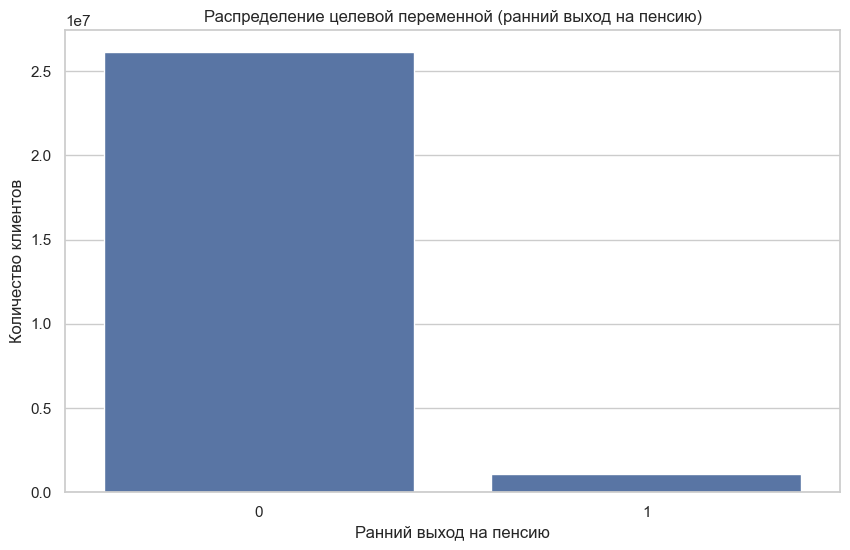

In [7]:
# 1. Гистограмма целевой переменной (erly_pnsn_flg)
plt.figure()
sns.countplot(data=data, x='erly_pnsn_flg')
plt.title("Распределение целевой переменной (ранний выход на пенсию)")
plt.xlabel("Ранний выход на пенсию")
plt.ylabel("Количество клиентов")
plt.show()

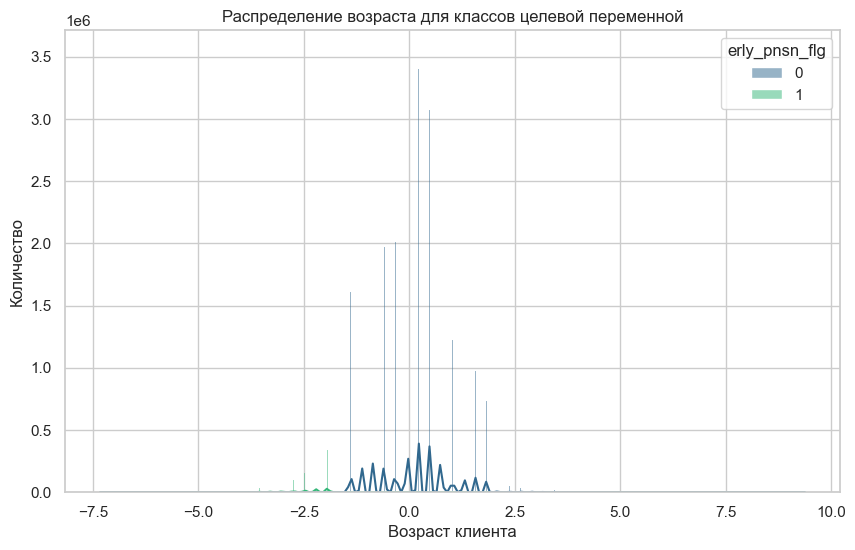

In [8]:
# 2. Распределение возраста (prsnt_age) для каждого класса целевой переменной
plt.figure()
sns.histplot(data=data, x='prsnt_age', hue='erly_pnsn_flg', kde=True, palette="viridis")
plt.title("Распределение возраста для классов целевой переменной")
plt.xlabel("Возраст клиента")
plt.ylabel("Количество")
plt.show()

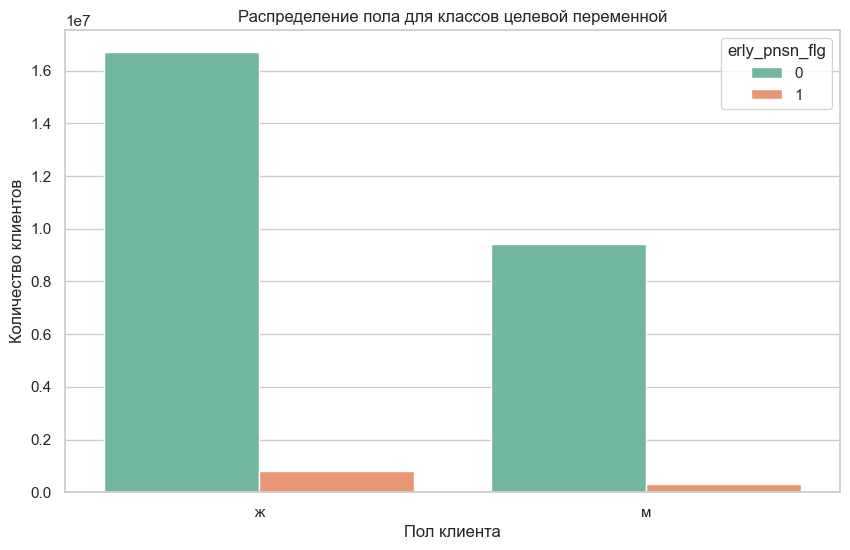

In [11]:
# 5. Распределение пола (gndr) для каждого класса целевой переменной
plt.figure()
sns.countplot(data=data, x='gndr', hue='erly_pnsn_flg', palette="Set2")
plt.title("Распределение пола для классов целевой переменной")
plt.xlabel("Пол клиента")
plt.ylabel("Количество клиентов")
plt.show()

In [6]:
data['rgn'].value_counts()

rgn
СВЕРДЛОВСКАЯ ОБЛ          2733920
ВОЛГОГРАДСКАЯ ОБЛ         1010210
САРАТОВСКАЯ ОБЛ            934298
ИРКУТСКАЯ ОБЛ              876505
ВОЛОГОДСКАЯ ОБЛ            837047
                           ...   
БАЙКОНУР Г                    123
РЕСП БАШКОРТОСТАН             102
УКРАИНА                        98
ДОНЕЦКАЯ НАРОДНАЯ РЕСП         97
ЗАПОРОЖСКАЯ ОБЛ                50
Name: count, Length: 102, dtype: int64

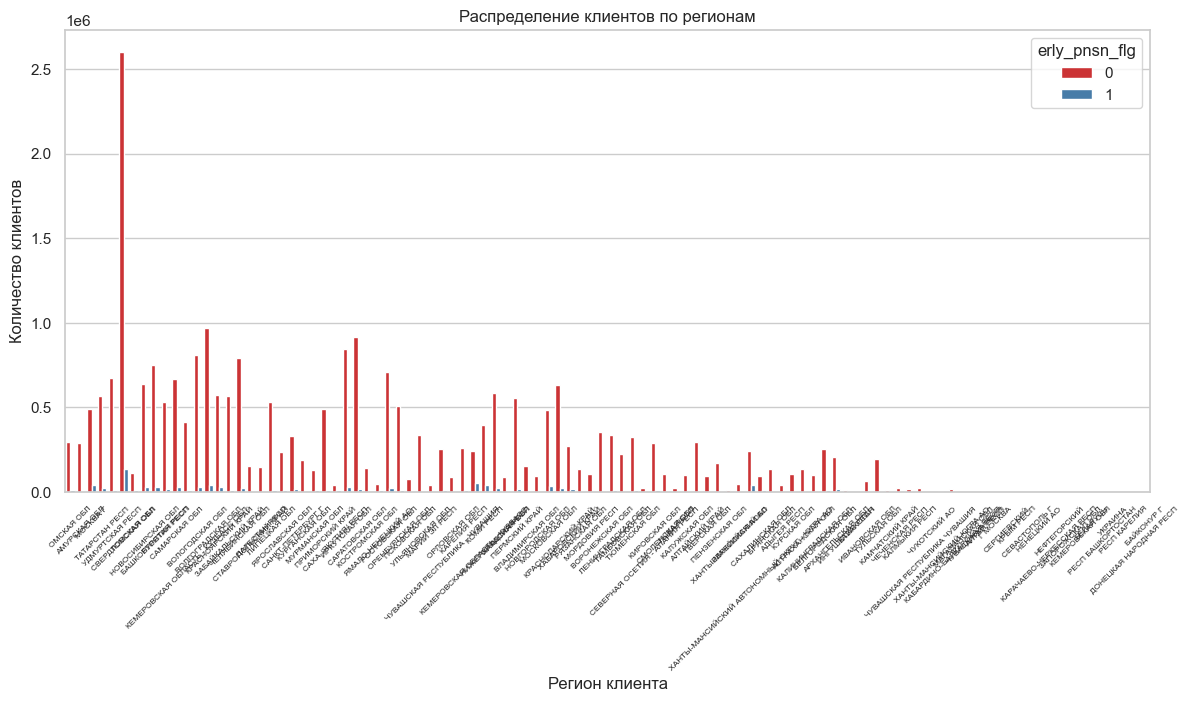

In [7]:
# 6. Географическая визуализация (распределение по регионам)
plt.figure(figsize=(14, 6))
sns.countplot(data=data, x='rgn', hue='erly_pnsn_flg', palette="Set1")
plt.title("Распределение клиентов по регионам")
plt.xlabel("Регион клиента")
plt.ylabel("Количество клиентов")
plt.xticks(rotation=45, fontsize=6)
plt.show()

In [3]:
replacements = {
    "ОБЛ": "область",
    "КРАЙ": "край",
}

def format_region_name(name):
    if not pd.notna(name):
        return name
    
    if 'РЕСП' == name[-4:]:
        return f'Республика {" ".join(name.split()[:-1]).capitalize()}'
    
    for old, new in replacements.items():
        name = name.replace(old, new)  # Заменяем сокращения
    return name.capitalize()

# Применяем функцию к столбцу с названиями регионов
data['rgn'] = data['rgn'].apply(format_region_name)

In [4]:
data_filtered = data.sample(n=30000, random_state=1)  # random_state для воспроизводимости

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка карты России
world = gpd.read_file('optional/ne_110m_admin_0_countries.shp')
russia = world[world['NAME'] == "Russia"]

# Предположим, что у вас есть датафрейм с данными по регионам
# Например, data содержит столбцы "region" (регион) и "value" (например, количество клиентов)
# data = pd.DataFrame({'region': [...], 'value': [...]})

# Загружаем границы российских регионов (для России нужна отдельная база границ, например, GeoJSON с регионами РФ)
regions = gpd.read_file("optional/russia_regions.geojson")  # Замените на путь к файлу с регионами

# Примерно объединяем данные по регионам с географической информацией (потребуется совпадение названий)
merged = regions.merge(data_filtered, left_on="region", right_on="rgn")

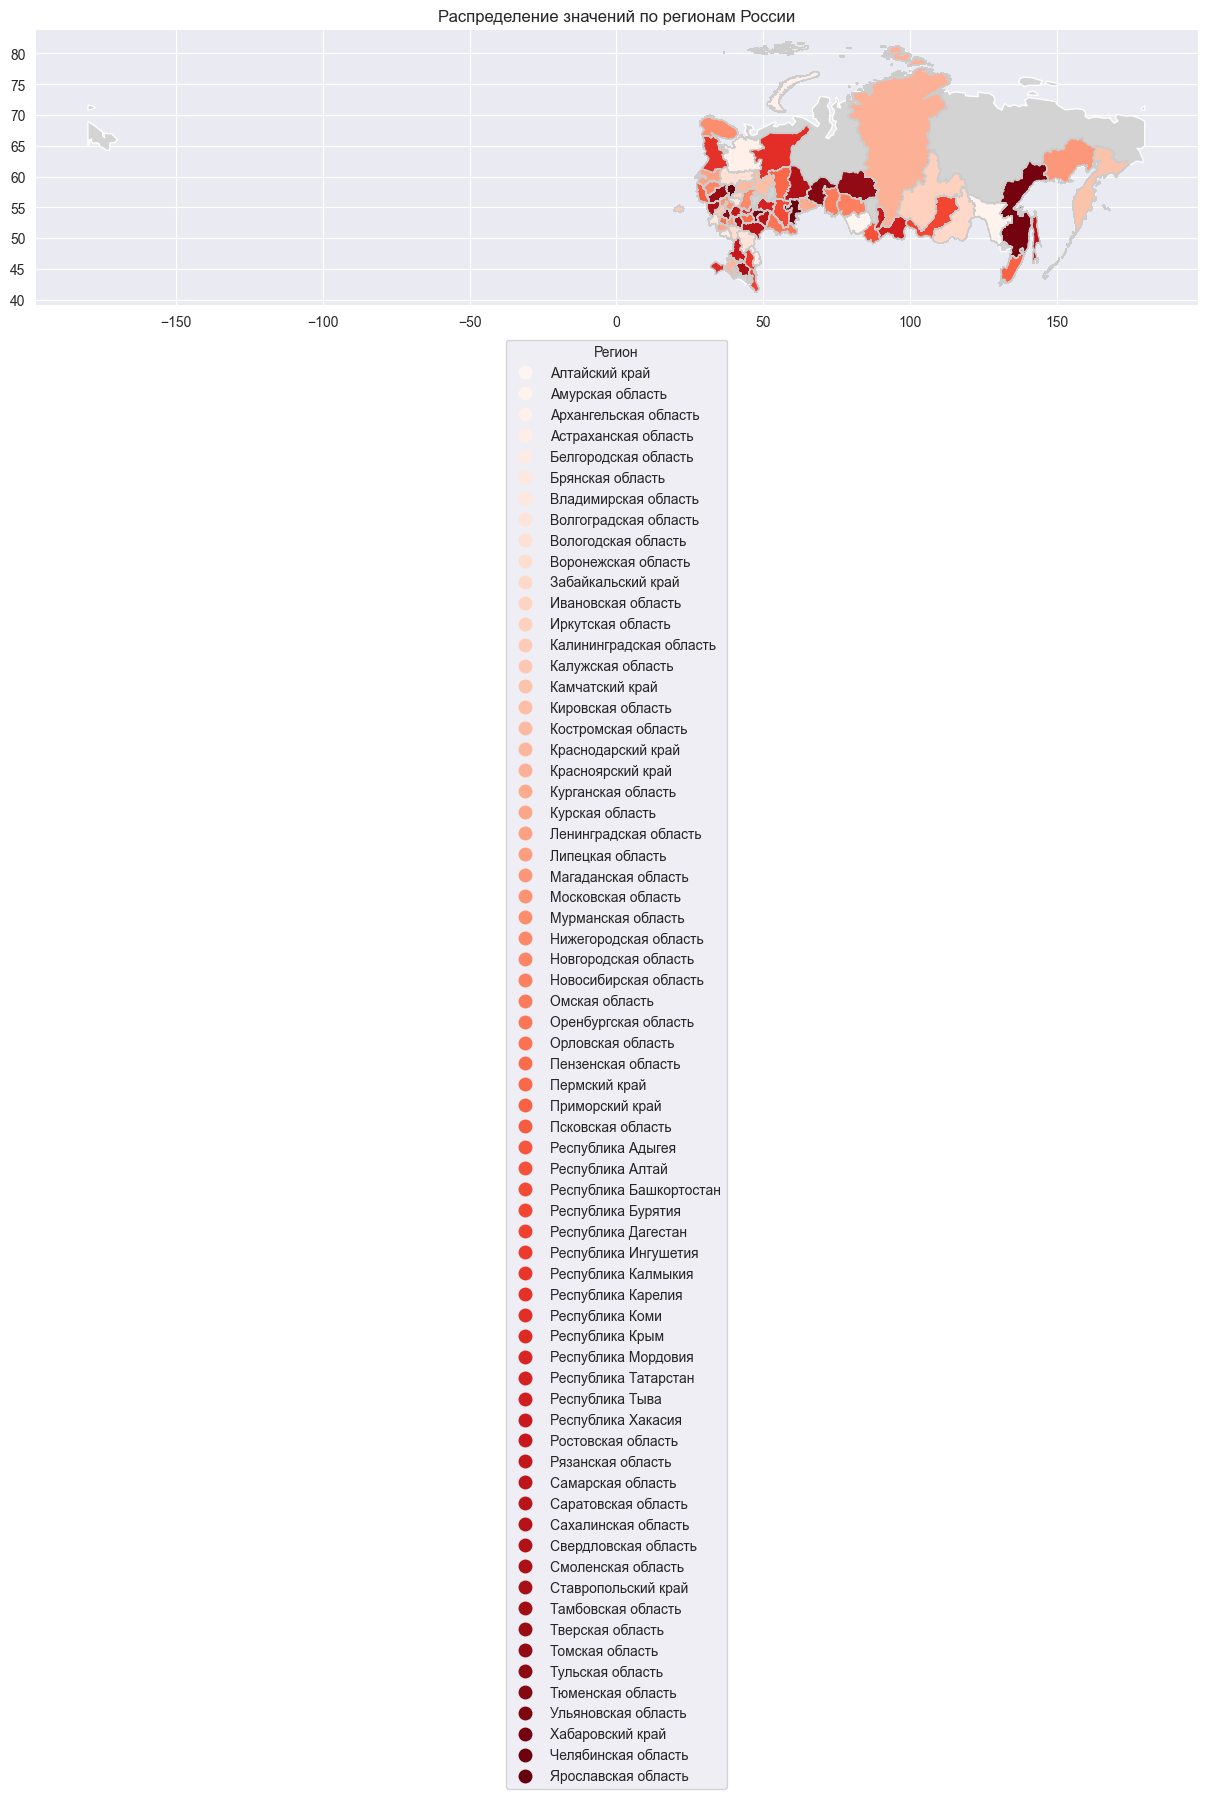

In [17]:
# Построение карты с раскраской по значениям
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
russia.plot(ax=ax, color='lightgrey')  # Подложка всей России
merged.plot(column="region", cmap="Reds", linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Настройка положения легенды под графиком
# Указываем параметры для отображения внизу, не вызывая plt.legend()
ax.get_legend().set_bbox_to_anchor((0.5, -0.1))  # Позиционируем под картой
ax.get_legend().set_loc("upper center")
ax.get_legend().set_title("Регион")  # Название для легенды

plt.title("Распределение значений по регионам России")
plt.show()

In [14]:
# 7. Временные графики для транзакционной активности (sum по времени)
# Преобразование даты операции в формат datetime, если необходимо
data['oprtn_date'] = pd.to_datetime(data['oprtn_date'], errors='coerce')

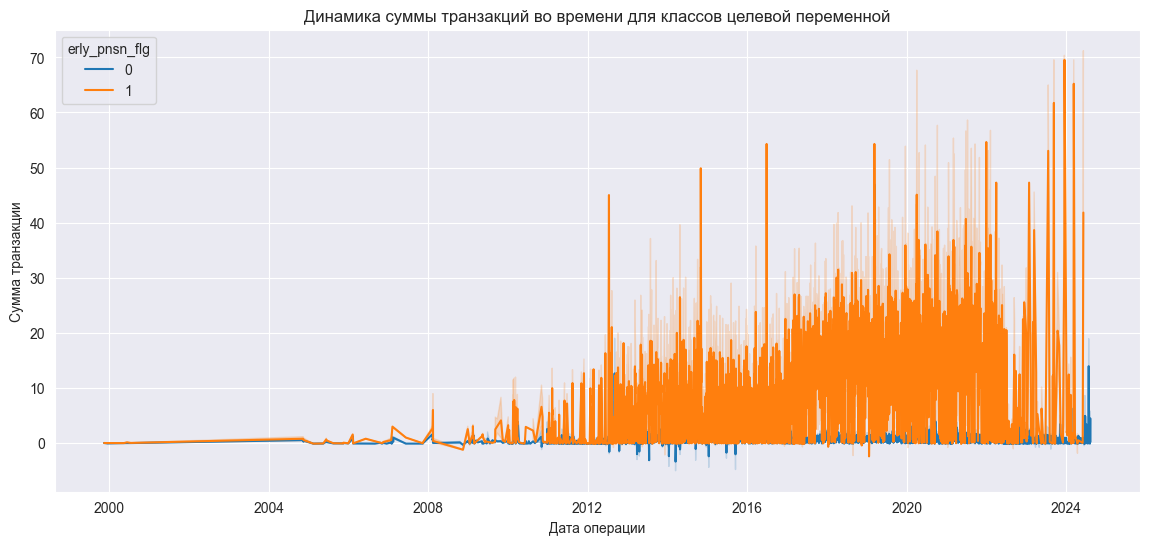

In [15]:
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=data.sort_values('oprtn_date'), x='oprtn_date', y='sum', hue='erly_pnsn_flg', palette="tab10")
plt.title("Динамика суммы транзакций во времени для классов целевой переменной")
plt.xlabel("Дата операции")
plt.ylabel("Сумма транзакции")
plt.show()

C:\Users\macar\AppData\Local\Temp\ipykernel_12180\3195699278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='erly_pnsn_flg', y='sum', palette="coolwarm")


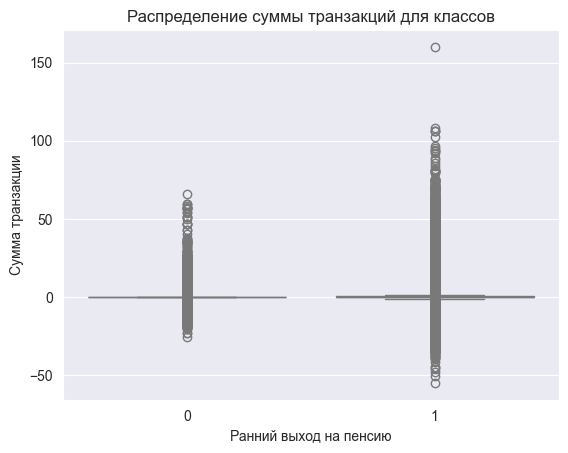

In [16]:
# 8. Boxplot для суммы транзакций по классу целевой переменной
plt.figure()
sns.boxplot(data=data, x='erly_pnsn_flg', y='sum', palette="coolwarm")
plt.title("Распределение суммы транзакций для классов")
plt.xlabel("Ранний выход на пенсию")
plt.ylabel("Сумма транзакции")
plt.show()